<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from error_analysis_funs import *

methods = ['qeep-cons', 'pencil']

phases = np.random.uniform(0, 2*np.pi, 3)
#[4.77144,    2.82579877, 4.88021636, 0.41070768, 3.06350016]
num_phases = len(phases)

final_error = 0.01
alpha = 2
gamma = 4.1
epsilons = [0.3]
eps0 = 0.1

cutoff = 1/ num_phases / 3

amplitudes = np.ones(num_phases)/num_phases

estimates = {}
costs = {}
for method in methods:
    estimates[method] = {}
    costs[method] = {}

for method in methods:
    for eps in epsilons:
        
        print(method, eps)
        e,c  = multiorder_estimation(method,
                             phases, amplitudes,
                             eps, eps0, alpha, gamma,
                             final_error, cutoff)
        estimates[method][eps] = e
        costs[method][eps] = c

qeep-cons 0.3
Got $k_1 < d_\zeta^{-1}$, exiting
pencil 0.3
Got $k_1 < d_\zeta^{-1}$, exiting


<>:9: DeprecationWarning: invalid escape sequence \e
<ipython-input-2-3aff95c63445>:9: DeprecationWarning: invalid escape sequence \e
  plt.title(f'$\epsilon = {eps}$')


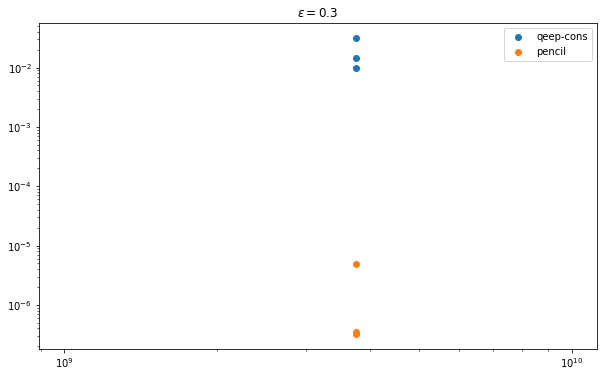

In [2]:
plt.figure(figsize = (10, 6))
for i,eps in enumerate(epsilons):
    plt.subplot(1,len(epsilons),i+1)
    for method in methods:
        estimation_errors = get_estimation_errors(estimates[method][eps], phases)
        plt.scatter([c for c_vec in costs[method][eps] for c in c_vec ], [e for e_vec in estimation_errors for e in e_vec ], label = method)
    plt.yscale('log')
    plt.xscale('log')
    plt.title(f'$\epsilon = {eps}$')
    plt.legend()
plt.show()

<>:8: DeprecationWarning: invalid escape sequence \e
<>:8: DeprecationWarning: invalid escape sequence \e
<ipython-input-3-b41ef9093306>:8: DeprecationWarning: invalid escape sequence \e
  plt.title(method+f', $\epsilon$ = {eps}')


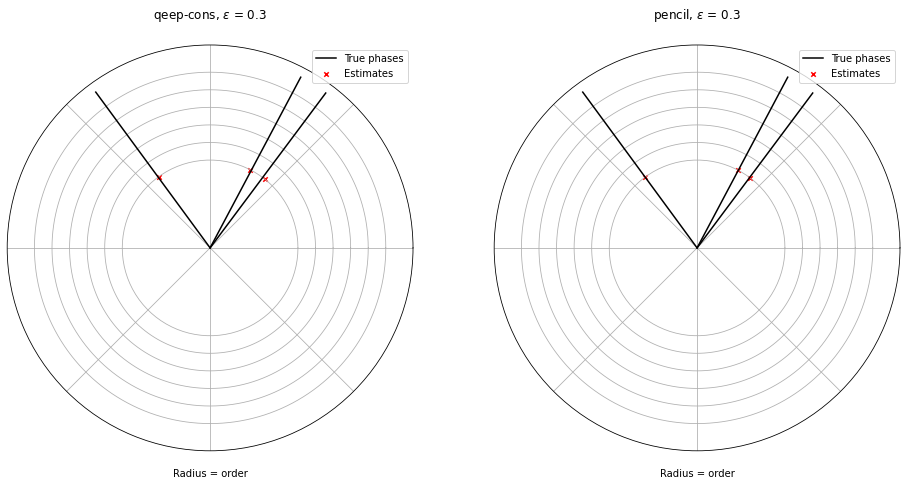

In [3]:
plt.figure(figsize = (16, 12))
i = 0
for eps in epsilons:
    for method in methods:
        i+=1
        plt.subplot(len(epsilons), len(methods), i, projection='polar')
        plot_phase_estimates(phases, estimates[method][eps], np.ceil(np.log2(2*eps/final_error)).astype('int'))
        plt.title(method+f', $\epsilon$ = {eps}')
plt.show()

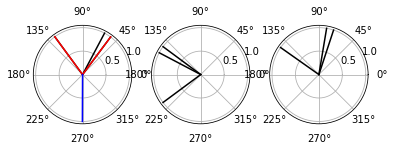

In [4]:
from sparse_qpe import _wn_diff
#phases = np.random.uniform(0, 2*np.pi, 5)
#phases = [3, 4.1]
phases = np.sort(phases)
phase_differences = [
    abs_phase_difference(phases[j], phases[(j+1) % len(phases)]) for j in range(len(phases))
]
ix = np.argmax(phase_differences)
phase1 = phases[ix]
phase2 = phases[(ix+1) % len(phases)]
zeta = (phase1+phase2)/2
if np.min([abs_phase_difference(phase,zeta+np.pi) for phase in phases]) > np.min([abs_phase_difference(phase,zeta) for phase in phases]):
    zeta+=np.pi
d_zeta = np.min([abs_phase_difference(phase,zeta) for phase in phases])

plt.subplot(1,3,1, projection='polar')
for phase in phases:
    plt.plot([0, phase], [0, 1], color = 'black')
plt.plot([0, phase1], [0, 1], color = 'red')
plt.plot([0, phase2], [0, 1], color = 'red')
plt.plot([0, zeta], [0, 1], color = 'blue')
plt.subplot(1,3,2, projection='polar')
for phase in phases:
    plt.plot([0, phase-zeta], [0, 1], color = 'black')
plt.subplot(1,3,3, projection='polar')
for phase in phases:
    plt.plot([0, phase-zeta-d_zeta/2], [0, 1], color = 'black')
plt.show()

In [5]:
print(kappa_finder(phases, 2*eps0, 1, np.pi / (2 * eps0)),
      kappa_finder(estimates['pencil'][0.3][0], 2*eps0, 1, np.pi / (2 * eps0)),
      kappa_finder(estimates['qeep-sparse'][0.3][0], 2*eps0, 1, np.pi / (2 * eps0))
     )

KeyError: 'qeep-sparse'

In [ ]:
phases

In [ ]:
phases = estimates['pencil'][0.3][0]
multiplier = kappa_finder(phases, 2*eps0, 1, np.pi / (2 * eps0))
print(multiplier)

phases = np.sort(phases)
phase_differences = [
    abs_phase_difference(phases[j], phases[(j+1) % len(phases)]) for j in range(len(phases))
]
ix = np.argmax(phase_differences)
phase1 = phases[ix]
phase2 = phases[(ix+1) % len(phases)]
zeta = (phase1+phase2)/2
if np.min([abs_phase_difference(phase,zeta+np.pi) for phase in phases]) > np.min([abs_phase_difference(phase,zeta) for phase in phases]):
    zeta+=np.pi
d_zeta = np.min([abs_phase_difference(phase,zeta) for phase in phases])

plt.subplot(1,3,1, projection='polar')
for phase in phases:
    plt.plot([0, phase], [0, 1], color = 'black')
plt.plot([0, phase1], [0, 1], color = 'red')
plt.plot([0, phase2], [0, 1], color = 'red')
plt.plot([0, zeta], [0, 1], color = 'blue')
plt.subplot(1,3,2, projection='polar')
for phase in phases:
    plt.plot([0, phase-zeta], [0, 1], color = 'black')
plt.bar((np.pi/multiplier+np.pi*(2*np.floor(multiplier)-1)/multiplier)/2,1,
       -np.pi/multiplier+np.pi*(2*np.floor(multiplier)-1)/multiplier)
plt.subplot(1,3,3, projection='polar')
for phase in phases:
    plt.plot([0, phase-zeta-d_zeta/2], [0, 1], color = 'black')
plt.bar((np.pi/multiplier+np.pi*(2*np.floor(multiplier)-1)/multiplier)/2,1,
       -np.pi/multiplier+np.pi*(2*np.floor(multiplier)-1)/multiplier)
#plt.plot([0, np.pi/multiplier], [0, 1], color = 'red')
#plt.plot([0, np.pi*(2*np.floor(multiplier)-1)/multiplier], [0, 1], color = 'red')
plt.show()

In [ ]:
#phases = list(phases)+[0]
num_points, signal_length, num_samples  = get_signal_requirements(0.99, 0.3)
print(num_points, signal_length, num_samples)
signal = get_gk(signal_length, phases, np.ones(len(phases))/len(phases), num_samples, 1)
spectral_function = np.real(qeep_solve(signal, num_points))

In [ ]:
plt.bar(get_phase_values(spectral_function), spectral_function)
plt.vlines(phases, 0, 1)
plt.vlines(qeep_sparse_solve(spectral_function, cutoff), 0, 0.9, 'red')
plt.vlines(qeep_approximate_single_eigenvalues(spectral_function, cutoff), 0, 0.8, 'blue')


In [ ]:
indices = [
        j for j,p in enumerate(spectral_function) if abs(p) > cutoff/3
    ]

In [ ]:
indices

In [ ]:
start = np.argmax(spectral_function < cutoff/3)

In [ ]:
indices = list(np.arange(21))

In [ ]:
for j in range(num_points):
        ix = (start+j) % num_points
        if ix in indices and (ix-1) % num_points in indices:
            indices.remove(ix)

In [ ]:
print(indices)

In [ ]:
get_phase_values(spectral_function)[indices]